# ybigta & P-SAT combined session project

## 대출데이터 분석


In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline 
sns.set_palette = "Set1"

In [2]:
pd.set_option("display.max_rows", 500)

## Data Import

- application_train : 성별, 수입, 교육수준 등 대출상품 등록 시 입력 정보
- bureau : 타 금융기관이 신용평가사에 보고한 고객의 과거 신용 정보
- bureau_balance : 신용평가사의 과거 신용 잔액 정보 
- credit_card_balance : 신청자가 가지고 있는 신용 카드의 과거 월별 잔액
- installmetns_payments : 이전에 지출한 상환 내역
- POS_CASH_balance : POS(판매 시점) 및 현금 대출의 과거 월별 잔액
- previous_application : 과거 대출상품 이용 기록

In [3]:
application_train = pd.read_csv("default/application_train.csv")
bureau = pd.read_csv("default/bureau.csv")
bureau_balance = pd.read_csv("default/bureau_balance.csv")
credit_card_balance = pd.read_csv("default/credit_card_balance.csv")
installments_payments = pd.read_csv("default/installments_payments.csv")
POS_CASH_balance = pd.read_csv("default/POS_CASH_balance.csv")
previous_application = pd.read_csv("default/previous_application.csv")

## 변수 선택 및 확인
- 주관적으로 필요한 변수에 대해서 정리하여 만들어냄. 추후 EDA를 끝내고 다른 방법들을 이용하여 변수의 중요도에 대한 판단을 추가할 예정

## EDA

In [4]:
Check_NA = pd.DataFrame(application_train.isna().sum(), columns= ["count_NA"])
Check_NA["ratio_NA"] = application_train.isna().sum()/len(application_train)
Check_NA

,count_NA,ratio_NA
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.000043


In [5]:
application_train.info()
application_train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280205 entries, 0 to 280204
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 260.8+ MB


SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [6]:
application_train.head().T

,0,1,2,3,4
SK_ID_CURR,100003,100004,100006,100007,100008
TARGET,0,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,F,M,F,M,M
FLAG_OWN_CAR,N,Y,N,N,N
FLAG_OWN_REALTY,N,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,270000,67500,135000,121500,99000
AMT_CREDIT,1.2935e+06,135000,312682,513000,490496
AMT_ANNUITY,35698.5,6750,29686.5,21865.5,27517.5


#### 파일 확인 
- application_train 데이터는 280205개의 행, 122개의 열로 구성된 데이터

### 변수 확인  by 시각화

- NAME_CONTRACT_TYPE : Identification if loan is cash or revolving 
- 2개의 범주로 구성된 범주형 변수
- 대출의 종류에 따라 유의미한 결과를 도출할 것으로 보임
- Cash loans 대출이 대다수를 차지한 것으로 보임

NAME_CONTRACT_TYPE
Cash loans         0.048008
Revolving loans    0.031113
Name: NAME_CONTRACT_TYPE, dtype: float64

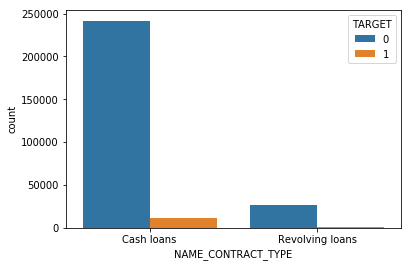

In [7]:
sns.countplot("NAME_CONTRACT_TYPE", hue="TARGET", data = application_train)
application_train.groupby("TARGET")["NAME_CONTRACT_TYPE"].value_counts()[1]/application_train.groupby("TARGET")["NAME_CONTRACT_TYPE"].value_counts()[0]

- CODE_GENDER	: Gender of the client
- 성별로 구성된 범주형 자료
- XNA의 경우 NA로 판단되며 3개의 데이터가 존재

CODE_GENDER
F      0.039737
M      0.059531
XNA         NaN
Name: CODE_GENDER, dtype: float64

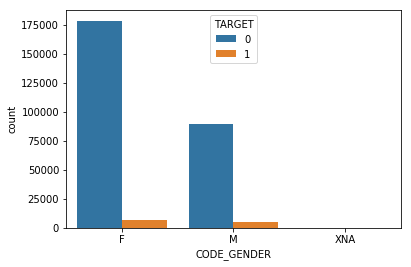

In [8]:
sns.countplot("CODE_GENDER", hue = "TARGET", data= application_train)
application_train.groupby("TARGET")["CODE_GENDER"].value_counts()[1]/application_train.groupby("TARGET")["CODE_GENDER"].value_counts()[0]

In [9]:
# XNA 개수 확인
len(application_train[lambda x: x["CODE_GENDER"]=="XNA"])

3

- FLAG_OWN_CAR : Flag if the client owns a car
- YES(Y), NO(N)로 구성된 범주형 변수

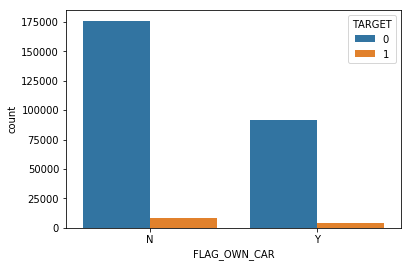

In [10]:
sns.countplot("FLAG_OWN_CAR", hue = "TARGET", data= application_train)

In [11]:
application_train.groupby("TARGET")["FLAG_OWN_CAR"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_OWN_CAR"].value_counts()[0]

FLAG_OWN_CAR
N    0.049329
Y    0.040658
Name: FLAG_OWN_CAR, dtype: float64

- FLAG_OWN_REALTY : Flag if client owns a house or flat
- YES(Y), NO(N)로 구성된 범주형 변수

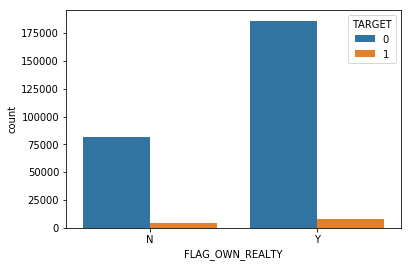

In [12]:
sns.countplot("FLAG_OWN_REALTY", hue = "TARGET", data= application_train)

In [13]:
application_train.groupby("TARGET")["FLAG_OWN_REALTY"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_OWN_REALTY"].value_counts()[0]

FLAG_OWN_REALTY
Y    0.045100
N    0.049201
Name: FLAG_OWN_REALTY, dtype: float64

- CNT_CHILDREN	Number of children the client has
- int형 자료

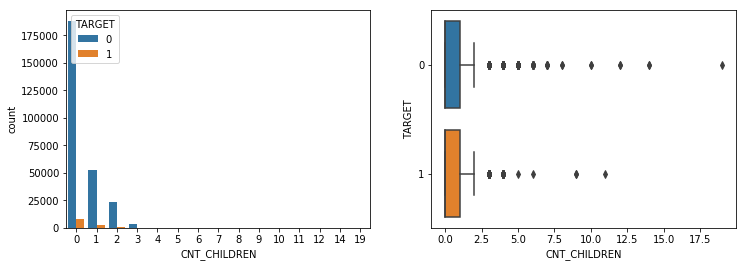

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
sns.countplot("CNT_CHILDREN", hue = "TARGET", data = application_train, ax=ax1)
sns.boxplot(x="CNT_CHILDREN", y="TARGET", data= application_train, ax=ax2, orient="h")

In [15]:
application_train.groupby("TARGET")["CNT_CHILDREN"].value_counts()

TARGET  CNT_CHILDREN
0       0               188224
        1                52815
        2                23120
        3                 3179
        4                  354
        5                   71
        6                   14
        7                    6
        8                    2
        10                   2
        12                   2
        14                   2
        19                   1
1       0                 8327
        1                 2728
        2                 1147
        3                  182
        4                   24
        9                    2
        5                    1
        6                    1
        11                   1
Name: CNT_CHILDREN, dtype: int64

- AMT_INCOME_TOTAL : Income of the client
- 수치형 자료
- 숫자 단위가 크다보니 격차가 매우 크게 나타나 그림이 잘 그려지지 않는 것을 확인할 수 있음 / 변수변환?
- 로그변환의 경우는 0 값이 존재하여 변환이 불가능함. 다른 scaler를 이용해야할듯.



C:\Users\hawi7\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


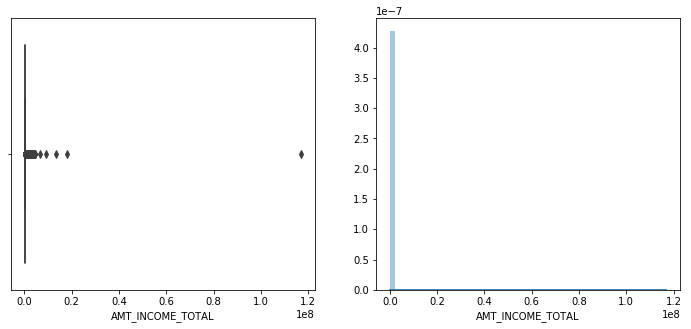

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize = (12, 5))
sns.boxplot(application_train.AMT_INCOME_TOTAL, ax=ax1)
sns.distplot(application_train.AMT_INCOME_TOTAL, ax=ax2)

C:\Users\hawi7\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


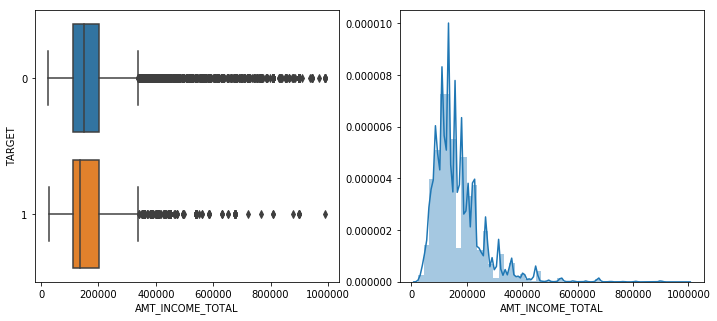

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize = (12, 5))
sns.boxplot(x = "AMT_INCOME_TOTAL", y = "TARGET", ax=ax1, data=application_train[lambda x:x["AMT_INCOME_TOTAL"]<1000000], orient = "h")
sns.distplot(application_train[lambda x:x["AMT_INCOME_TOTAL"]<1000000].AMT_INCOME_TOTAL, ax=ax2)

- AMT_CREDIT : Credit amount of the loan(자산)
- 수치형 자료

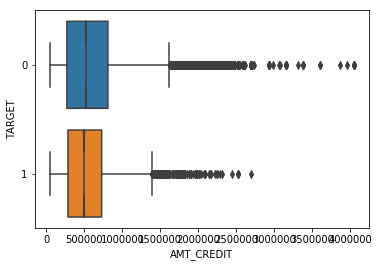

In [18]:
sns.boxplot(y = "TARGET", x = "AMT_CREDIT", data = application_train, notch = True , orient = "h")

- AMT_ANNUITY : Loan annuity  
- 수치형 자료

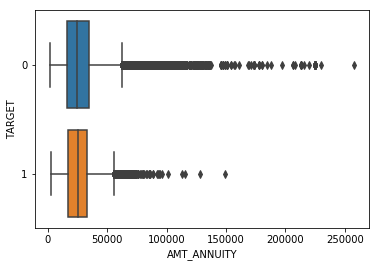

In [19]:
sns.boxplot(y = "TARGET", x= "AMT_ANNUITY", data = application_train, orient = "h")

- AMT_GOODS_PRICE :	For consumer loans it is the price of the goods for which the loan is given
- 수치형 자료

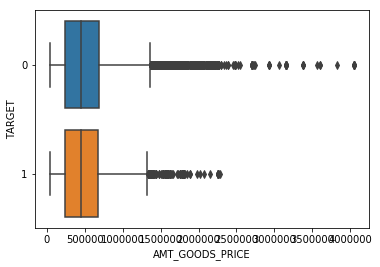

In [20]:
sns.boxplot(y= "TARGET", x = "AMT_GOODS_PRICE", data = application_train, orient= "h")

- NAME_TYPE_SUITE : Who was accompanying client when he was applying for the loan
- categorical data

NAME_TYPE_SUITE
Unaccompanied      0.047091
Family             0.042584
Spouse, partner    0.045867
Children           0.040866
Other_B            0.053360
Other_A            0.051383
Group of people    0.054622
Name: NAME_TYPE_SUITE, dtype: float64

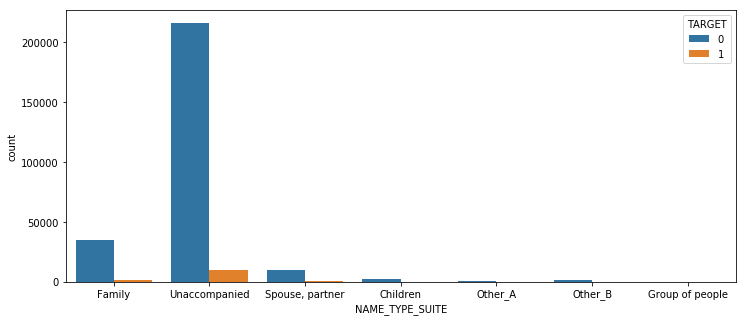

In [21]:
plt.figure(figsize=(12,5))
sns.countplot("NAME_TYPE_SUITE", data = application_train, hue = "TARGET")
application_train.groupby("TARGET")["NAME_TYPE_SUITE"].value_counts()[1]/application_train.groupby("TARGET")["NAME_TYPE_SUITE"].value_counts()[0]

- NAME_INCOME_TYPE : Clients income type (businessman, working, maternity leave, etc.
- 범주형 자료

NAME_INCOME_TYPE
Businessman                  NaN
Commercial associate    0.042465
Maternity leave         0.333333
Pensioner               0.029976
State servant           0.032557
Student                      NaN
Unemployed              0.214286
Working                 0.056073
Name: NAME_INCOME_TYPE, dtype: float64

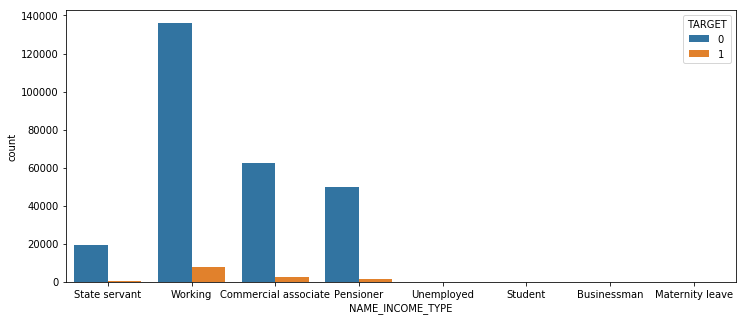

In [22]:
plt.figure(figsize=(12,5))
sns.countplot("NAME_INCOME_TYPE", data = application_train, hue = "TARGET")
application_train.groupby("TARGET")["NAME_INCOME_TYPE"].value_counts()[1]/application_train.groupby("TARGET")["NAME_INCOME_TYPE"].value_counts()[0]

- NAME_EDUCATION_TYPE : Level of highest education the client achieved
- 범주형 자료

NAME_EDUCATION_TYPE
Secondary / secondary special    0.051647
Higher education                 0.030409
Incomplete higher                0.047196
Lower secondary                  0.068118
Academic degree                  0.006452
Name: NAME_EDUCATION_TYPE, dtype: float64

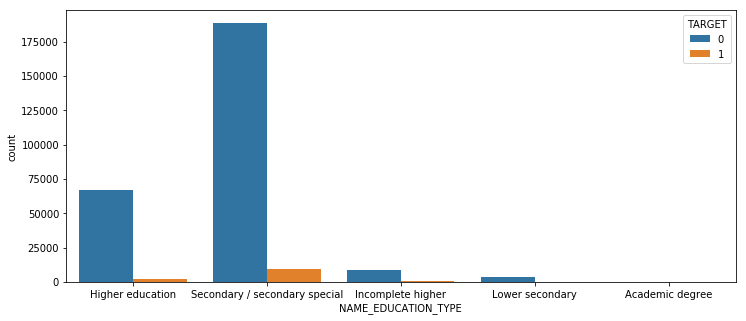

In [23]:
plt.figure(figsize=(12,5))
sns.countplot("NAME_EDUCATION_TYPE", data= application_train, hue = "TARGET")
application_train.groupby("TARGET")["NAME_EDUCATION_TYPE"].value_counts()[1]/application_train.groupby("TARGET")["NAME_EDUCATION_TYPE"].value_counts()[0]

- NAME_FAMILY_STATUS : Family status of the client
- 범주형 자료

NAME_FAMILY_STATUS
Civil marriage          0.057349
Married                 0.043044
Separated               0.047338
Single / not married    0.058256
Unknown                      NaN
Widow                   0.033180
Name: NAME_FAMILY_STATUS, dtype: float64

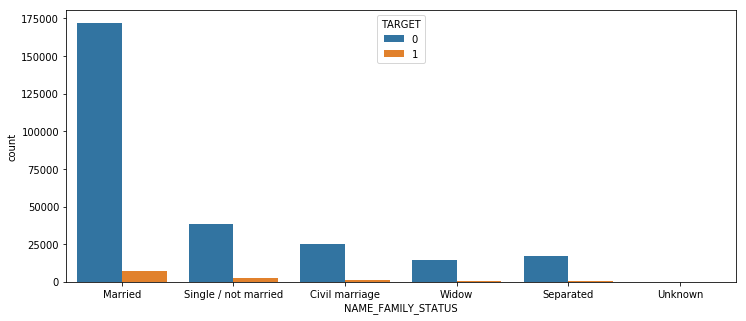

In [24]:
plt.figure(figsize=(12,5))
sns.countplot("NAME_FAMILY_STATUS" , data= application_train, hue = "TARGET")
application_train.groupby("TARGET")["NAME_FAMILY_STATUS"].value_counts()[1]/application_train.groupby("TARGET")["NAME_FAMILY_STATUS"].value_counts()[0]

In [25]:
# 결측치라고 판단됨
application_train[lambda x:x["NAME_FAMILY_STATUS"]=="Unknown"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
38214,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
170484,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


- NAME_HOUSING_TYPE	: What is the housing situation of the client (renting, living with parents, ...)	
- 범주형 자료

NAME_HOUSING_TYPE
House / apartment      0.044607
With parents           0.071076
Municipal apartment    0.048304
Rented apartment       0.074785
Office apartment       0.033839
Co-op apartment        0.051724
Name: NAME_HOUSING_TYPE, dtype: float64

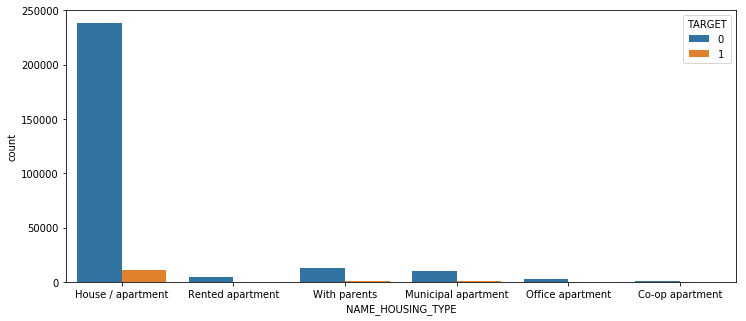

In [26]:
plt.figure(figsize=(12,5))
sns.countplot("NAME_HOUSING_TYPE", data=application_train, hue="TARGET")
application_train.groupby("TARGET")["NAME_HOUSING_TYPE"].value_counts()[1]/application_train.groupby("TARGET")["NAME_HOUSING_TYPE"].value_counts()[0]

- REGION_POPULATION_RELATIVE : Normalized population of region where client lives (higher number means the client lives in more populated region)
- 수치형자료

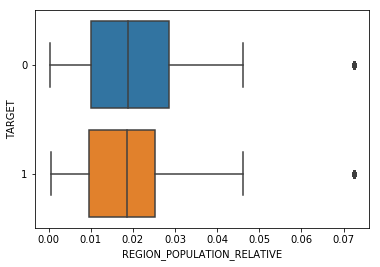

In [27]:
sns.boxplot(y= "TARGET", x = "REGION_POPULATION_RELATIVE", data = application_train, orient= "h")

- DAYS_BIRTH : Client's age in days at the time of application
- 수치형 자료
- 년도 기준으로 바꾸는 것도 고려해볼만한 요소임

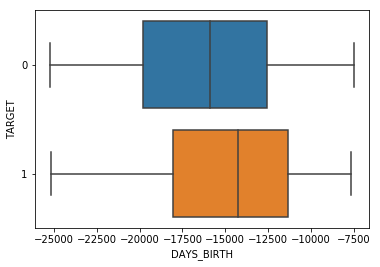

In [28]:
sns.boxplot(y= "TARGET", x = "DAYS_BIRTH", data = application_train, orient= "h")

In [29]:
app2 = application_train
app2["DAYS_BIRTH"] = application_train["DAYS_BIRTH"] / 365

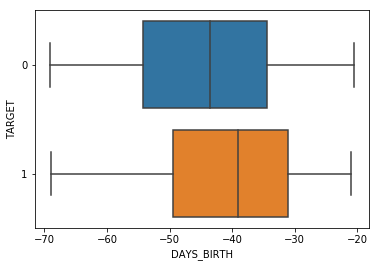

In [30]:
sns.boxplot(y= "TARGET", x = "DAYS_BIRTH", data = app2, orient= "h")

- DAYS_EMPLOYED : How many days before the application the person started current employment
- 역시 수치형 자료

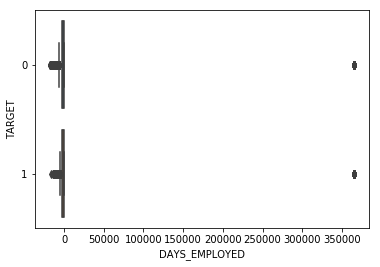

In [31]:
sns.boxplot(y= "TARGET", x = "DAYS_EMPLOYED", data = application_train, orient= "h")

In [32]:
application_train.DAYS_EMPLOYED.max()

365243

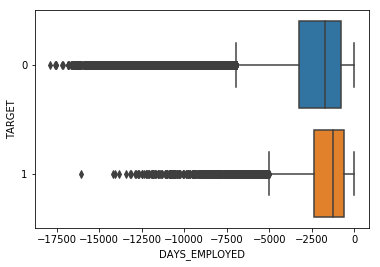

In [33]:
# 이상치 제거해보고 확인
len(application_train[lambda x:x["DAYS_EMPLOYED"] == application_train.DAYS_EMPLOYED.max()])
sns.boxplot(y= "TARGET", x = "DAYS_EMPLOYED", data = application_train[lambda x:x["DAYS_EMPLOYED"] < application_train.DAYS_EMPLOYED.max()], orient= "h")

- DAYS_REGISTRATION : How many days before the application did client change his registration
- 역시 수치형 자료, 년도 기준으로 바꿀 필요성도 있을듯

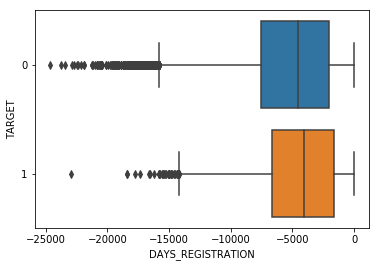

In [34]:
sns.boxplot(y= "TARGET", x = "DAYS_REGISTRATION", data = application_train, orient= "h")

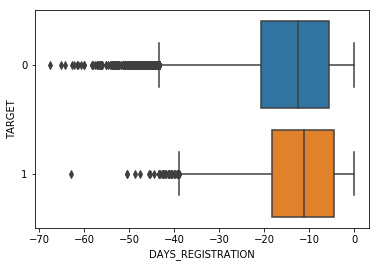

In [35]:
app2["DAYS_REGISTRATION"] = application_train["DAYS_REGISTRATION"] / 365
sns.boxplot(y= "TARGET", x = "DAYS_REGISTRATION", data = app2, orient= "h")

- DAYS_ID_PUBLISH : How many days before the application did client change the identity document with which he applied for the loan
- 역시 수치형 자료, 년도 기준으로 바꿀 필요성도 있을듯

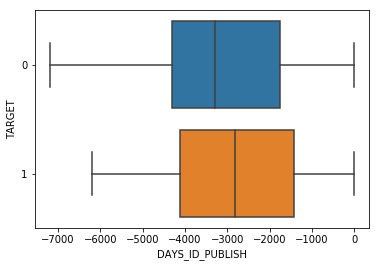

In [36]:
sns.boxplot(y= "TARGET", x = "DAYS_ID_PUBLISH", data = application_train, orient= "h")

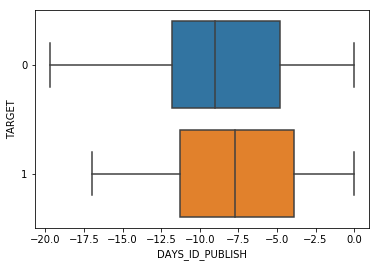

In [37]:
app2["DAYS_ID_PUBLISH"] = application_train["DAYS_ID_PUBLISH"] / 365
sns.boxplot(y= "TARGET", x = "DAYS_ID_PUBLISH", data = app2, orient= "h")

- OWN_CAR_AGE : Age of client's car
- 수치형 자료

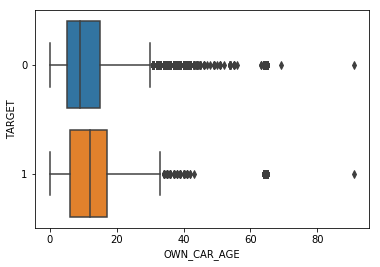

In [38]:
sns.boxplot(y= "TARGET", x = "OWN_CAR_AGE", data = application_train, orient= "h")

- FLAG_MOBIL : Did client provide mobile phone (1=YES, 0=NO)
- FLAG_EMP_PHONE : Did client provide work phone (1=YES, 0=NO)
- FLAG_WORK_PHONE : Did client provide home phone (1=YES, 0=NO)
- FLAG_CONT_MOBILE : Was mobile phone reachable (1=YES, 0=NO)
- FLAG_PHONE : Did client provide home phone (1=YES, 0=NO)
- FLAG_EMAIL : Did client provide email (1=YES, 0=NO)
- 대답 여부로 작성된 범주형 자료

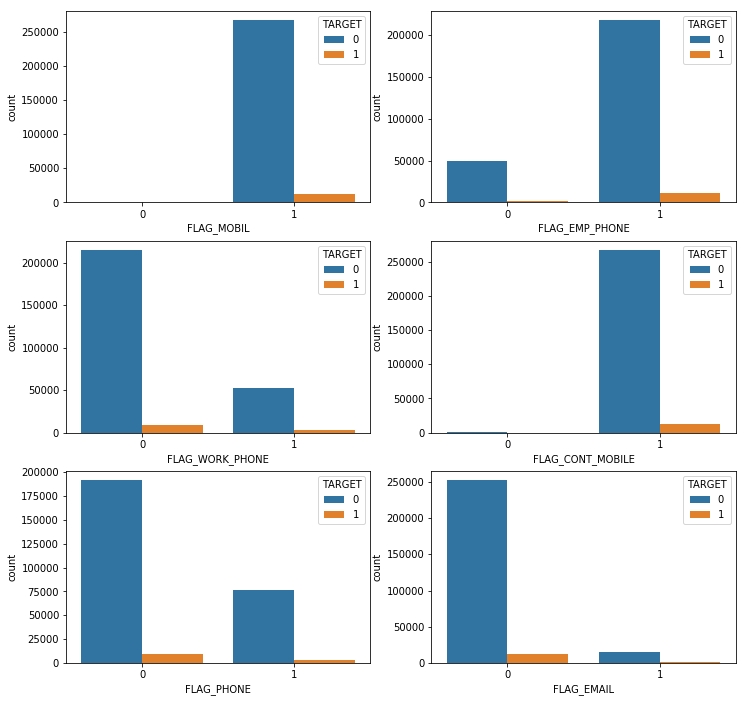

In [39]:
fig, [(ax1, ax2), (ax3, ax4), (ax5, ax6)] = plt.subplots(nrows=3, ncols=2, figsize = (12,12))
sns.countplot("FLAG_MOBIL", hue="TARGET", data = application_train, ax=ax1)
sns.countplot("FLAG_EMP_PHONE", hue="TARGET", data = application_train, ax=ax2)
sns.countplot("FLAG_WORK_PHONE", hue="TARGET", data = application_train, ax=ax3)
sns.countplot("FLAG_CONT_MOBILE", hue="TARGET", data = application_train, ax=ax4)
sns.countplot("FLAG_PHONE", hue="TARGET", data = application_train, ax = ax5)
sns.countplot("FLAG_EMAIL", hue="TARGET", data = application_train, ax = ax6)

In [66]:
print(" ",application_train.groupby("TARGET")["FLAG_MOBIL"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_MOBIL"].value_counts()[0],"\n",
application_train.groupby("TARGET")["FLAG_EMP_PHONE"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_EMP_PHONE"].value_counts()[0],"\n",
     application_train.groupby("TARGET")["FLAG_WORK_PHONE"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_WORK_PHONE"].value_counts()[0],"\n",
     application_train.groupby("TARGET")["FLAG_CONT_MOBILE"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_CONT_MOBILE"].value_counts()[0],"\n",
     application_train.groupby("TARGET")["FLAG_PHONE"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_PHONE"].value_counts()[0],"\n",
     application_train.groupby("TARGET")["FLAG_EMAIL"].value_counts()[1]/application_train.groupby("TARGET")["FLAG_EMAIL"].value_counts()[0])

  FLAG_MOBIL
0         NaN
1    0.046353
Name: FLAG_MOBIL, dtype: float64 
 FLAG_EMP_PHONE
1    0.050066
0    0.030027
Name: FLAG_EMP_PHONE, dtype: float64 
 FLAG_WORK_PHONE
0    0.043800
1    0.056827
Name: FLAG_WORK_PHONE, dtype: float64 
 FLAG_CONT_MOBILE
1    0.046347
0    0.049407
Name: FLAG_CONT_MOBILE, dtype: float64 
 FLAG_PHONE
0    0.048856
1    0.040055
Name: FLAG_PHONE, dtype: float64 
 FLAG_EMAIL
0    0.046413
1    0.045359
Name: FLAG_EMAIL, dtype: float64


- OCCUPATION_TYPE : What kind of occupation does the client have
- 범주형 자료

OCCUPATION_TYPE
Accountants              0.026498
Cleaning staff           0.053925
Cooking staff            0.065369
Core staff               0.036460
Drivers                  0.066210
HR staff                 0.038076
High skill tech staff    0.034510
IT staff                 0.036481
Laborers                 0.062635
Low-skill Laborers       0.102923
Managers                 0.033528
Medicine staff           0.038182
Private service staff    0.035941
Realty agents            0.049844
Sales staff              0.058027
Secretaries              0.044674
Security staff           0.063403
Waiters/barmen staff     0.068689
Name: OCCUPATION_TYPE, dtype: float64

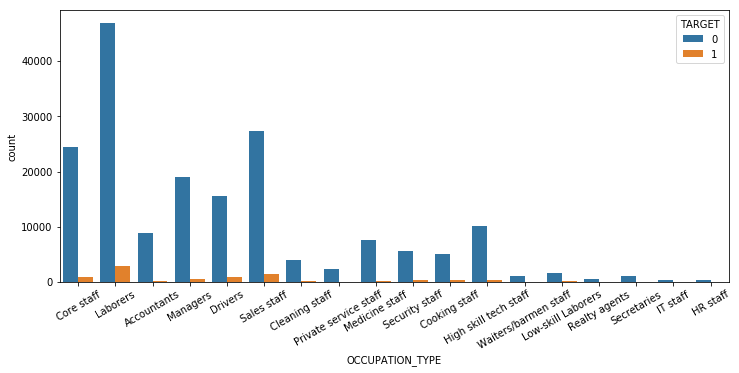

In [53]:
plt.figure(figsize=(12,5))
g = sns.countplot("OCCUPATION_TYPE", hue = "TARGET", data = application_train)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
application_train.groupby("TARGET")["OCCUPATION_TYPE"].value_counts()[1]/application_train.groupby("TARGET")["OCCUPATION_TYPE"].value_counts()[0]

- CNT_FAM_MEMBERS : How many family members does client have
- 수치형 자료

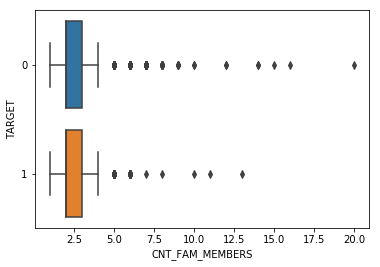

In [57]:
sns.boxplot(y= "TARGET", x = "CNT_FAM_MEMBERS", data = application_train, orient= "h")

- REGION_RATING_CLIENT : Our rating of the region where client lives (1,2,3)
- REGION_RATING_CLIENT_W_CITY : Our rating of the region where client lives with taking city into account (1,2,3)
- 범주형 자료
- 서로 크게 다른자료가 아닌 것으로 보임.


REGION_RATING_CLIENT
2    0.045025
3    0.067167
1    0.026294
Name: REGION_RATING_CLIENT, dtype: float64 
 REGION_RATING_CLIENT_W_CITY
2    0.045267
3    0.069018
1    0.026384
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


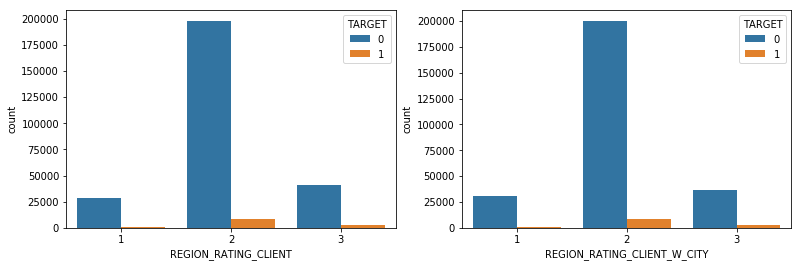

In [75]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
sns.countplot("REGION_RATING_CLIENT", hue= "TARGET",data = application_train, ax = ax1)
sns.countplot("REGION_RATING_CLIENT_W_CITY", hue= "TARGET",data = application_train, ax = ax2)
print(application_train.groupby("TARGET")["REGION_RATING_CLIENT"].value_counts()[1]/application_train.groupby("TARGET")["REGION_RATING_CLIENT"].value_counts()[0],"\n",
application_train.groupby("TARGET")["REGION_RATING_CLIENT_W_CITY"].value_counts()[1]/application_train.groupby("TARGET")["REGION_RATING_CLIENT_W_CITY"].value_counts()[0])

0         0.0800
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11        0.1600
12        0.4000
13           NaN
14           NaN
15           NaN
16        0.0000
17           NaN
18        0.0000
19           NaN
20        0.1400
21        0.0000
22        0.0000
23           NaN
24           NaN
25        0.1600
26        0.0000
27        0.2800
28        0.0000
29           NaN
30        0.0000
31        0.0000
32           NaN
33           NaN
34        0.0400
35        0.0000
36           NaN
37        0.2400
38           NaN
39           NaN
40           NaN
41           NaN
42           NaN
43           NaN
44        0.0800
45           NaN
46           NaN
47        0.2400
48        0.0400
49           NaN
50        0.0000
51           NaN
52        0.0000
53        0.0400
54        0.0000
55        0.1600
56           NaN
57        0.0000
58        0.16

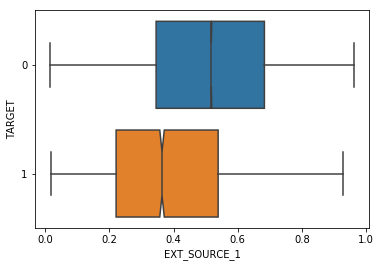

In [47]:
sns.boxplot(y= "TARGET", x = "EXT_SOURCE_1", data = application_train, orient= "h", notch=True)

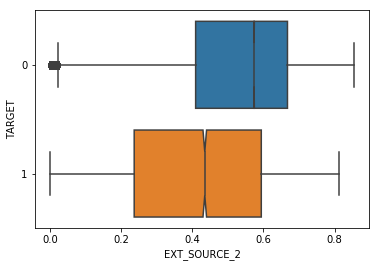

In [48]:
sns.boxplot(y= "TARGET", x = "EXT_SOURCE_2", data = application_train, orient= "h", notch=True)

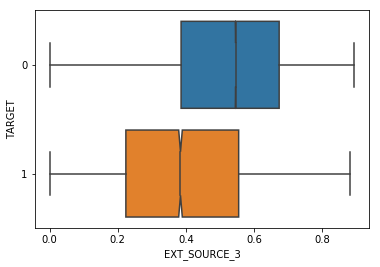

In [49]:
sns.boxplot(y= "TARGET", x = "EXT_SOURCE_3", data = application_train, orient= "h", notch=True)

In [50]:
application_train[["AMT_INCOME_TOTAL"]]

,AMT_INCOME_TOTAL
0,270000.000
1,67500.000
2,135000.000
3,121500.000
4,99000.000
5,171000.000
6,360000.000
7,112500.000
8,135000.000
9,112500.000
